# Heart Attack

## Importing Needed packages

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from  io import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

%matplotlib inline

## Loading Data

In [2]:
df = pd.read_csv('heart.csv')

# take a look at the dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration

In [3]:
# summarize the data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data pre-processing and selection

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

## Pre-processing
Using df as the Drug.csv data read by pandas, declare the following variables:

X as the Feature Matrix (data of df)
y as the response vector (target)
Remove some columns.

In [5]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol' , 'fbs', 'restecg' , 'fbs', 'restecg' , 'exng']]
y = df[['output']]

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size = 0.3, random_state = 3)

# Decision Tree

## Setting up the Decision Tree and Evaluation

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

max_depth = 10
best_acc = 0
best_depth = 0
best_resTree = DecisionTreeClassifier(criterion="entropy", max_depth = 1)


for depth in range (3 , max_depth):
    resTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    resTree.fit(X_trainset,y_trainset)
    predTree = resTree.predict(X_testset)
    acc = metrics.accuracy_score(y_testset, predTree)
    if best_acc < acc :
        best_depth = depth
        best_acc = acc
        best_resTree = resTree

## Result of Evaluation

Best Depth of DecisionTrees's:  6
Best DecisionTrees's Accuracy:  0.7362637362637363


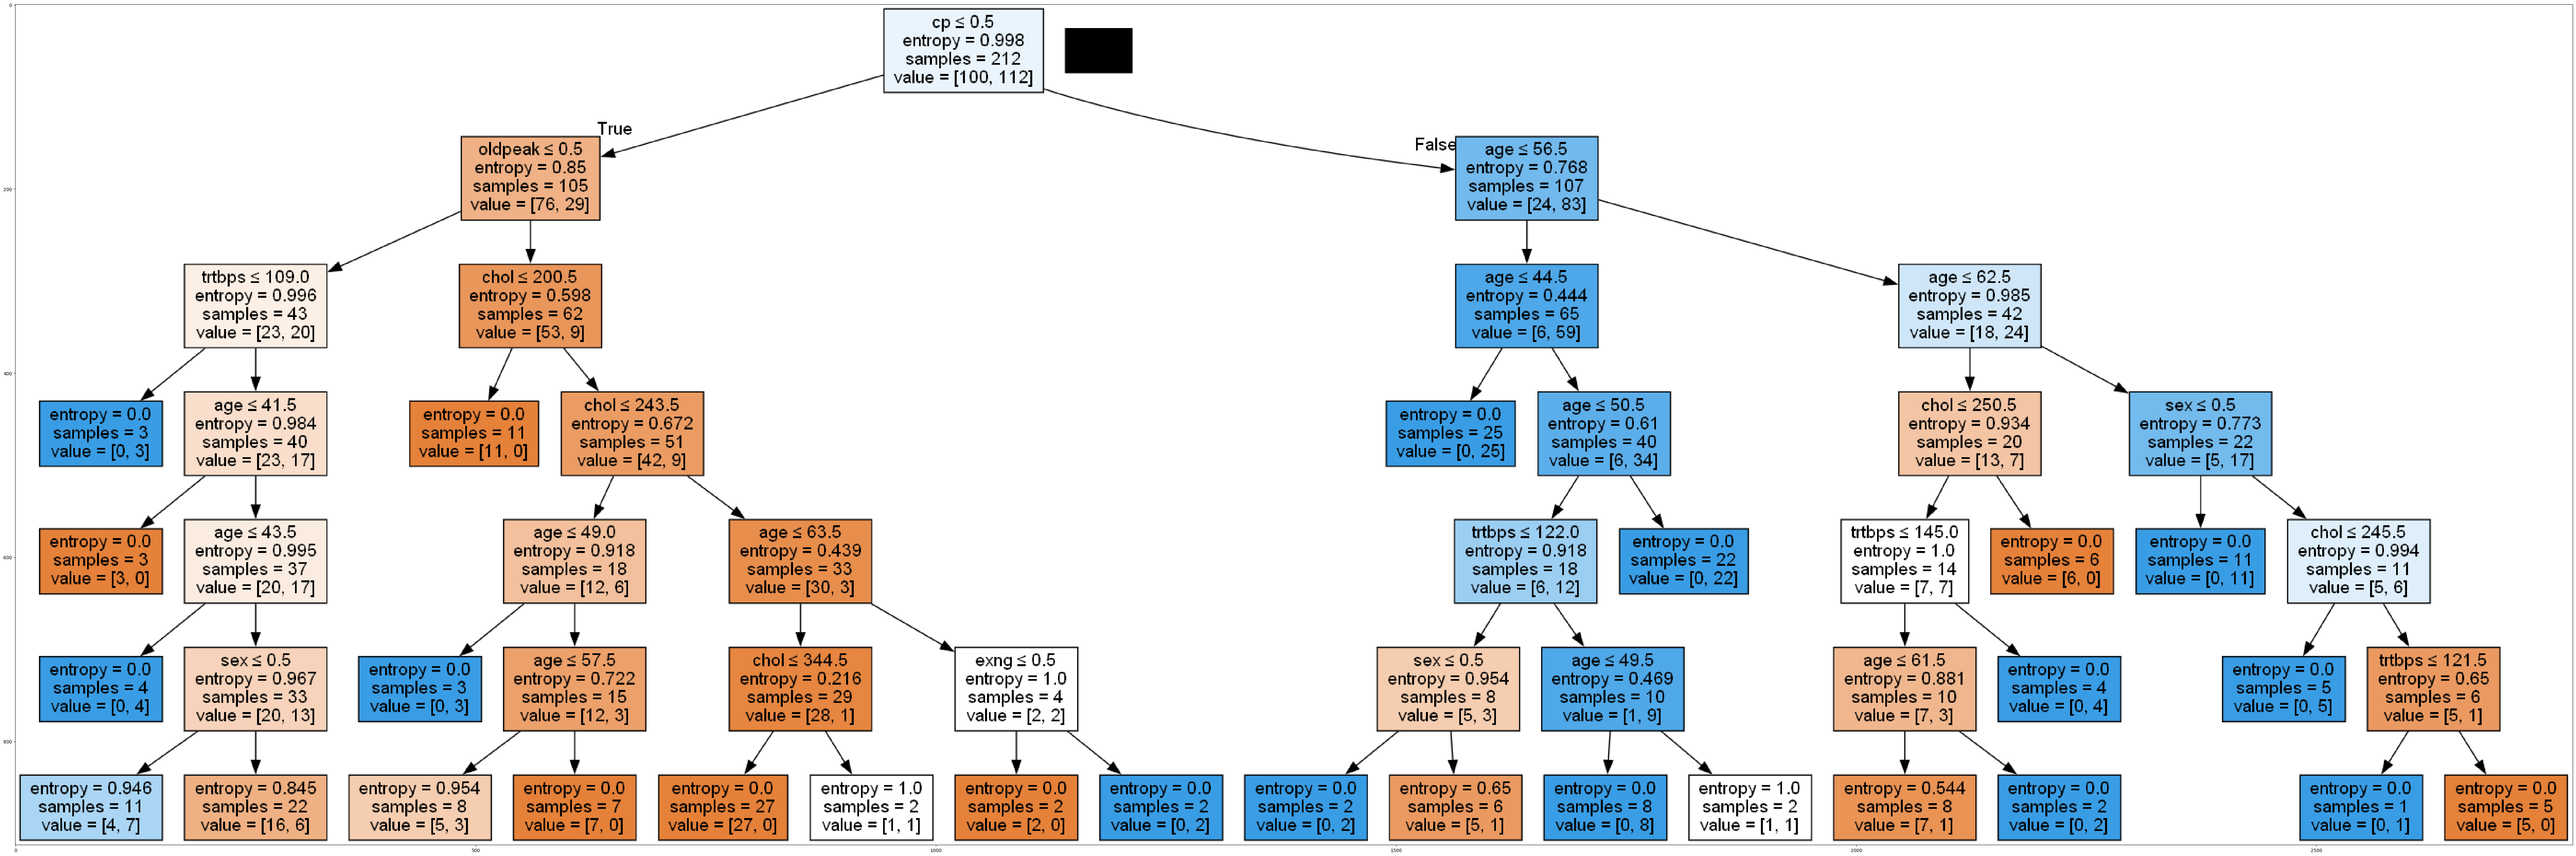

In [7]:
import matplotlib.pyplot as plt

print("Best Depth of DecisionTrees's: ", best_depth)
print("Best DecisionTrees's Accuracy: ", best_acc)

dot_data = StringIO()
filename = "Heart_Attack_Tree.png"
featureNames = df.columns[0:10]
out = tree.export_graphviz(best_resTree, 
                           feature_names = featureNames, 
                           out_file = dot_data, 
                           filled=True, 
                           special_characters = True,
                           rotate = False)    
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize = (100, 200))
plt.imshow(img,interpolation = 'nearest')

# SVM (Support Vector Machines)

## Setting up the SVM and Evaluation

In [8]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

best_kernel = ''
best_f1_score = 0.0
best_jaccard = 0.0
best_clf = svm.SVC(kernel = 'rbf')
best_yhat = [1]


kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    clf = svm.SVC(kernel = kernel)
    clf.fit(np.asarray(X_trainset), np.ravel(y_trainset))
    yhat = clf.predict(X_testset)
    f1score = f1_score(y_testset, yhat, average='weighted') 
    jaccard = jaccard_score(y_testset, yhat, pos_label = 1)
    if best_jaccard < jaccard :
        best_kernel = kernel
        best_jaccard = jaccard
        best_f1_score = f1score
        best_clf = clf
        best_yhat = yhat

C:\Users\B_Ameri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\B_Ameri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\B_Ameri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\B_Ameri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Best Kernel of SVM:  linear
Best Jaccard score:  0.696969696969697
Best f1 score:  0.7766875981161696

              precision    recall  f1-score   support

           0       0.78      0.66      0.71        38
           1       0.78      0.87      0.82        53

    accuracy                           0.78        91
   macro avg       0.78      0.76      0.77        91
weighted avg       0.78      0.78      0.78        91

Confusion matrix, without normalization
[[25 13]
 [ 7 46]]


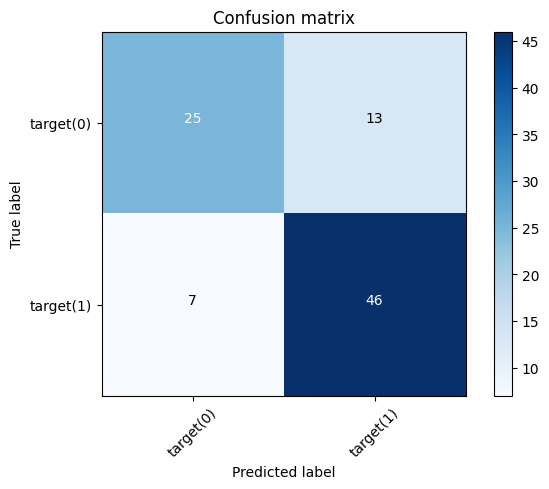

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
print("Best Kernel of SVM: ", best_kernel)
print("Best Jaccard score: ", best_jaccard)    
print("Best f1 score: ", best_f1_score)  
print()

cnf_matrix = confusion_matrix(y_testset, best_yhat, labels=[0,1])
np.set_printoptions(precision = 2)

print (classification_report(y_testset, best_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target(0)','target(1)'], normalize= False,  title='Confusion matrix')